   age  gender        bmi  children smoker     region       premium
0   56    male  32.024138         4     no  southeast   4743.846052
1   69    male  24.902931         2    yes  northeast  11015.830053
2   46    male  24.611732         4    yes  southeast   4152.044797
3   32  female  26.848156         3     no  southeast  10843.551505
4   60    male  31.493619         4    yes  southeast   7594.054257
   age  gender        bmi  children smoker     region       premium
0   56    male  32.024138         4     no  southeast   4743.846052
1   69    male  24.902931         2    yes  northeast  11015.830053
2   46    male  24.611732         4    yes  southeast   4152.044797
3   32  female  26.848156         3     no  southeast  10843.551505
4   60    male  31.493619         4    yes  southeast   7594.054257
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 

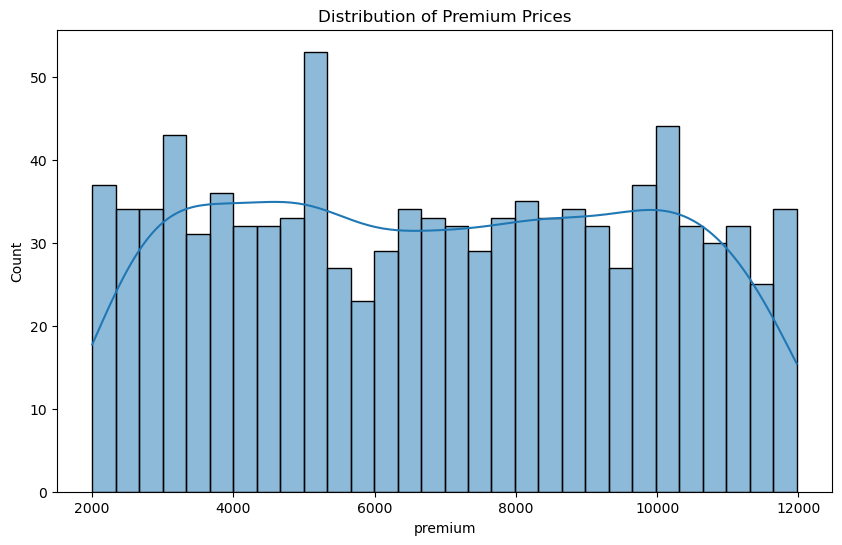

C:\Users\uday kiran\AppData\Local\Temp\ipykernel_4540\2276669659.py:54: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


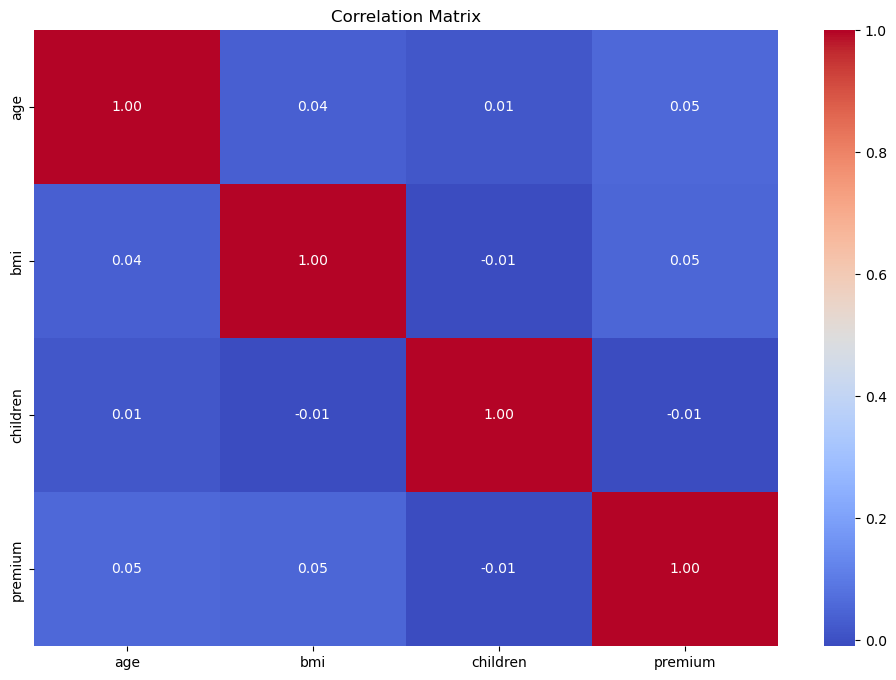

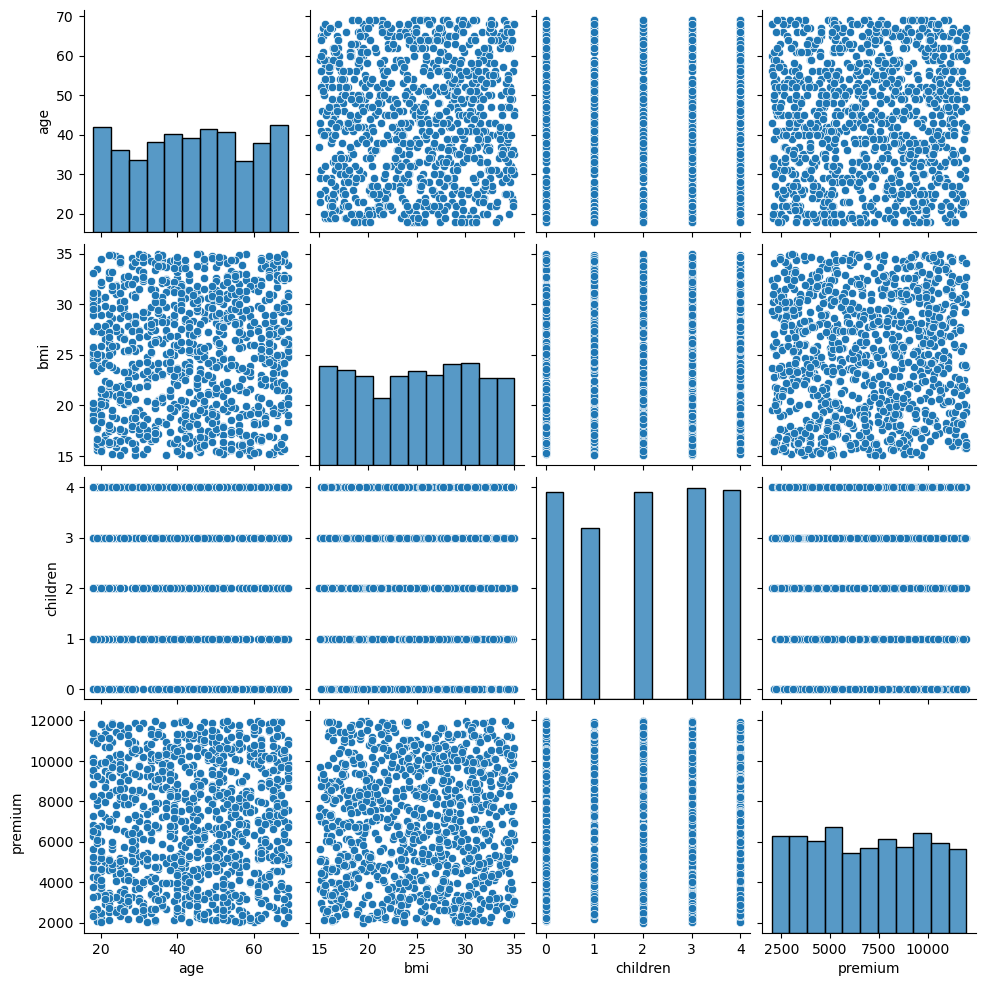

Mean Squared Error: 8261296.613113361
R^2 Score: -0.018325156339804805


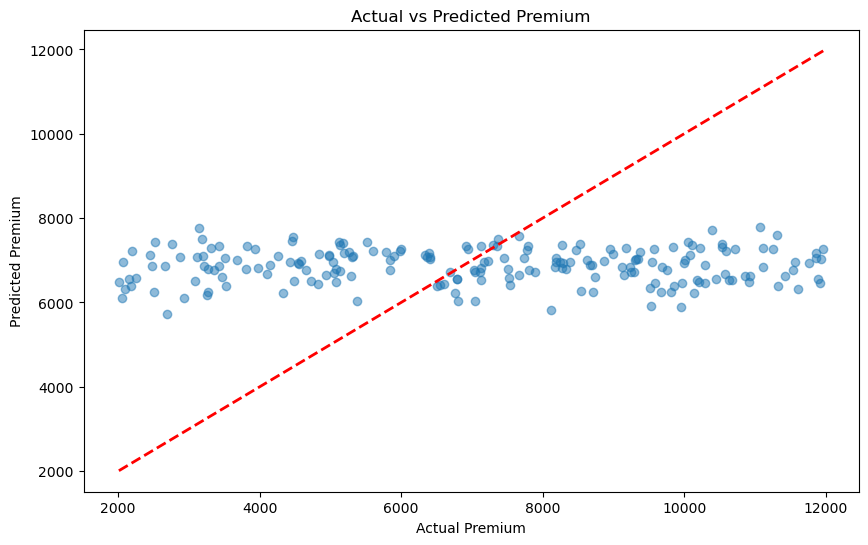

In [6]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic data
data = {
    'age': np.random.randint(18, 70, num_samples),
    'gender': np.random.choice(['male', 'female'], num_samples),
    'bmi': np.random.uniform(15, 35, num_samples),
    'children': np.random.randint(0, 5, num_samples),
    'smoker': np.random.choice(['yes', 'no'], num_samples),
    'region': np.random.choice(['northeast', 'northwest', 'southeast', 'southwest'], num_samples),
    'premium': np.random.uniform(2000, 12000, num_samples)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv('insurance_data.csv', index=False)

# Display the first few rows of the dataset
print(df.head())
# Load the dataset
df = pd.read_csv('insurance_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Get basic information about the dataset
print(df.info())

# Describe the dataset to get summary statistics
print(df.describe())
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable (premium)
plt.figure(figsize=(10, 6))
sns.histplot(df['premium'], kde=True, bins=30)
plt.title('Distribution of Premium Prices')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to see the relationships between variables
sns.pairplot(df)
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split the data into features and target
X = df.drop('premium', axis=1)
y = df['premium']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Premium')
plt.show()